We start by getting the data.

In [1]:
import os
import urllib
import zipfile
import numpy as np
import pandas as pd

DATA_PATH = os.path.join("..", "data")
DOWNLOAD_URL = (
    "https://github.com/SpikeLab-CL/challenge_watershed/raw/main/flux.csv.zip"
)
FILENAME = "flux.csv"


def fetch_data(data_path: str = DATA_PATH, download_url: str = DOWNLOAD_URL) -> None:
    """
    Download the requested file to the specified folder.

    Parameters
    ----------
    data_path : string
        Folder path.
    download_url : string
        File URL.

    Returns
    -------
    None
    """
    zip_path = os.path.join(data_path, "flux.csv.zip")
    urllib.request.urlretrieve(download_url, zip_path)
    with zipfile.ZipFile(zip_path) as zfile:
        zfile.extractall(data_path)


def load_data(data_path: str = DATA_PATH, filename: str = FILENAME) -> pd.DataFrame:
    """
    Obtain DataFrame from file with parsed dates and sorted by them.

    Parameters
    ----------
    data_path : string
        Folder path.
    filename : string
        Filename.

    Returns
    -------
    pd.DataFrame
    """

    file_path = os.path.join(data_path, filename)
    df = pd.read_csv(file_path)
    df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d", errors="coerce")
    df = df.sort_values(by=["date"]).reset_index(drop=True)
    return df

In [3]:
fetch_data()

In [2]:
df = load_data()

## Exploratory data analysis

### Structure

Lets see the shape of the data, some random entries, and some statistical information of each column.

In [31]:
df.shape

(4180480, 10)

In [47]:
df.sample(5)

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
2367284,2005-01-15,1001002,1.630,0.000000,10.053343,Rio Caquena En Vertedero,-17.9942,-69.2550,4652.603986,467.556222
936755,1991-02-16,5410002,18.500,0.000000,14.592384,Rio Aconcagua En Chacabuquito,-32.8503,-70.5094,3177.583522,2113.422512
3672664,2015-09-20,11711000,429.000,0.000000,5.852269,Rio Pascua Ante Junta Rio Quetru,-48.1592,-73.0889,975.286275,14121.323846
1042805,1992-04-01,7381001,0.005,6.975927,21.857131,Estero Los Puercos En Puente Los Puercos,-35.3736,-71.8292,205.547785,558.825299
2844134,2008-12-24,9414001,41.200,0.000000,19.310039,Rio Trancura Antes Rio Llafenco,-39.3333,-71.7667,1146.684138,1379.353866


In [58]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   date        4180480 non-null  datetime64[ns]
 1   basin_id    4180480 non-null  int64         
 2   flux        4180480 non-null  float64       
 3   precip      4175037 non-null  float64       
 4   temp_max    4175037 non-null  float64       
 5   gauge_name  4180480 non-null  object        
 6   lat         4180480 non-null  float64       
 7   lon         4180480 non-null  float64       
 8   mean_elev   4180480 non-null  float64       
 9   area_km2    4180480 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 318.9+ MB


In [83]:
df.describe(exclude=[np.number, "datetime"])

,gauge_name
count,4175037
unique,503
top,Rio Aconcagua En Chacabuquito
freq,14638


In [82]:
df.describe(include=[np.number, "datetime"], datetime_is_numeric=True)

,date,basin_id,flux,precip,temp_max,lat,lon,mean_elev,area_km2
count,4175037,4.175037e+06,4.175037e+06,4.175037e+06,4.175037e+06,4.175037e+06,4.175037e+06,4.175037e+06,4.175037e+06
mean,2001-08-29 15:30:38.407563392,7.179221e+06,5.249398e+01,2.947445e+00,1.365728e+01,-3.569397e+01,-7.129583e+01,1.760149e+03,2.403915e+03
min,1980-01-01 00:00:00,1.001001e+06,0.000000e+00,0.000000e+00,-1.160359e+01,-5.494690e+01,-7.366670e+01,1.181229e+02,1.789123e+01
25%,1992-04-05 00:00:00,4.558001e+06,8.690000e-01,0.000000e+00,9.162867e+00,-3.915000e+01,-7.231670e+01,5.847012e+02,3.761001e+02
50%,2002-09-04 00:00:00,7.350003e+06,5.180000e+00,0.000000e+00,1.321396e+01,-3.588420e+01,-7.137190e+01,1.195311e+03,8.205541e+02
75%,2011-05-08 00:00:00,9.416001e+06,2.990000e+01,6.422626e-01,1.805745e+01,-3.126560e+01,-7.050670e+01,3.048161e+03,2.461610e+03
max,2020-04-30 00:00:00,1.293000e+07,1.580500e+04,2.132120e+02,4.081117e+01,-1.784280e+01,-6.763920e+01,4.910152e+03,5.224367e+04
std,NaN,3.181164e+06,1.674156e+02,8.766749e+00,6.615037e+00,8.047914e+00,1.254446e+00,1.382302e+03,4.321229e+03


In [64]:
df.nunique().sort_values()

lon               454
lat               485
mean_elev         500
area_km2          500
basin_id          503
gauge_name        503
date            14768
flux            35978
precip        1384281
temp_max      3901982
dtype: int64

We notice that `gauge_name`, `basin_id`, `area_km2`, `mean_elev`, and (`lat`, `lon`) probably identify a unique basin.

### Quality

We now check for duplicates and for missing values.

In [65]:
df.duplicated().sum()

0

In [69]:
df.isna().mean()

date          0.000000
basin_id      0.000000
flux          0.000000
precip        0.001302
temp_max      0.001302
gauge_name    0.000000
lat           0.000000
lon           0.000000
mean_elev     0.000000
area_km2      0.000000
dtype: float64

We see that less than 0.2% of rows contain missing values. In this case, a safe choice will be to simply drop those rows.

### Feature distribution

Now we plot the histograms of the columns that are measurements.

<AxesSubplot:xlabel='temp_max', ylabel='Count'>

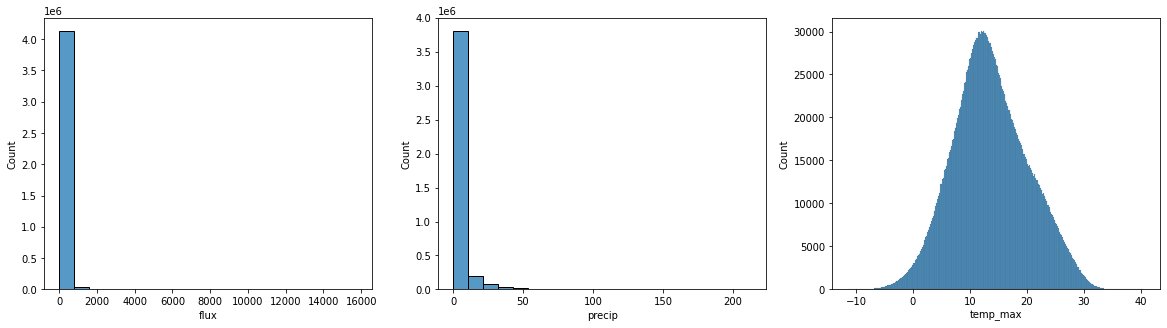

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(df["flux"], bins=20, ax=axs[0])
sns.histplot(df["precip"], bins=20, ax=axs[1])
sns.histplot(df["temp_max"], ax=axs[2])

We obtain a nice histogram fro `temp_max` but we notice that the histograms of `flux` and `precip` are highly skewed.
Lets look at them with more detail.

First, we divide each histogram in two according to a cutoff value (5 for both).

<AxesSubplot:xlabel='precip', ylabel='Count'>

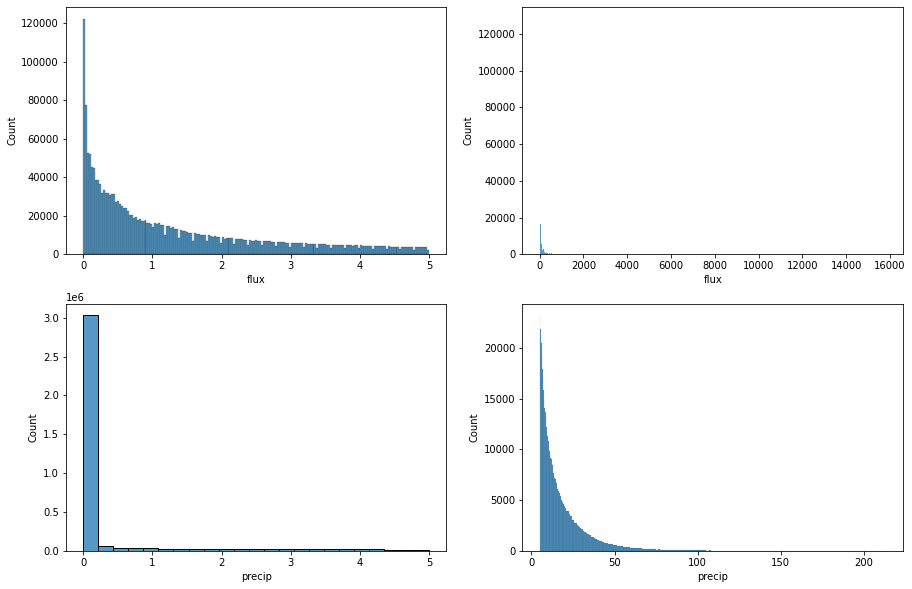

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df["flux"][df["flux"].lt(5)], ax=axs[0, 0])
sns.histplot(df["flux"][df["flux"].ge(5)], ax=axs[0, 1])
sns.histplot(df["precip"][df["precip"].lt(5)], ax=axs[1, 0])
sns.histplot(df["precip"][df["precip"].ge(5)], ax=axs[1, 1])

Another option is to remove the 0's and plot both features in logarithmic scale.

In [20]:
df["flux"].eq(0).sum()

489

In [21]:
df["precip"].eq(0).sum()

2777657

<AxesSubplot:xlabel='precip', ylabel='Count'>

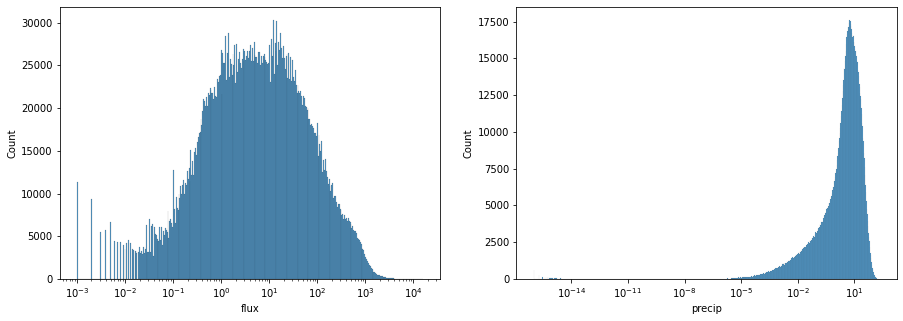

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df["flux"][df["flux"].gt(0)], ax=axs[0], log_scale=True)
sns.histplot(df["precip"][df["precip"].gt(0)], ax=axs[1], log_scale=True)

We can look at the scatterplots of the variables.

<AxesSubplot:xlabel='temp_max', ylabel='precip'>

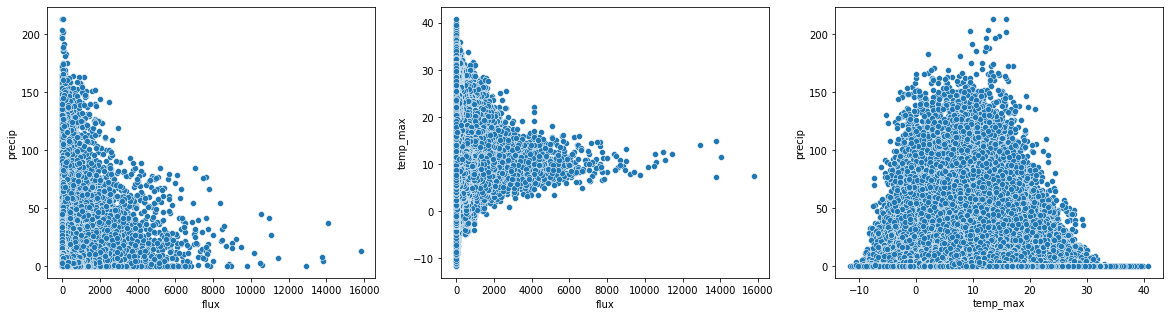

In [113]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x="flux", y="precip", data=df, ax=axs[0])
sns.scatterplot(x="flux", y="temp_max", data=df, ax=axs[1])
sns.scatterplot(x="temp_max", y="precip", data=df, ax=axs[2])

From these plots we can observe some relationships between the variables. For example, at very high/low temperatures fluxes tend to be small.

Since we also have spatial information of each basin, we can group them by clusters in order to see more clearly their distribution in a map.
This will be helpful later also.

In [14]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=15, batch_size=1000)
kmeans.fit(df[["lat", "lon"]])
df["region_cluster"] = kmeans.labels_
cluster_centers = pd.DataFrame(kmeans.cluster_centers_)
basins_lonlat = pd.concat([df["lon"], df["lat"]], axis=1)
basins_lonlat = basins_lonlat.drop_duplicates()

<AxesSubplot:>

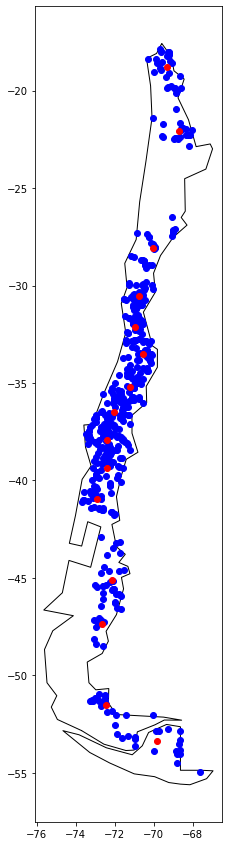

In [17]:
import geopandas

gdf = geopandas.GeoDataFrame(
    geometry=geopandas.points_from_xy(basins_lonlat["lon"], basins_lonlat["lat"])
)
gdf_clusters = geopandas.GeoDataFrame(
    geometry=geopandas.points_from_xy(cluster_centers[1], cluster_centers[0])
)

fig, ax = plt.subplots(figsize=(5, 15))

world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world[world.name == "Chile"].plot(color="white", edgecolor="black", ax=ax)

gdf.plot(ax=ax, color="blue")
gdf_clusters.plot(ax=ax, color="red")

We have basins almost all along the country.

### Plotting functions

Now we implement the functions for plotting specific timeseries.

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def plot_one_timeseries(
    basin_id: int,
    variable: str,
    min_date: str,
    max_date: str,
    ax: matplotlib.axes.Axes = None,
) -> None:
    """
    Plots the timeseries of a given variable in a given
    station between the specified dates.

    Parameters
    ----------
    basin_id : int
        ID of basin to plot.
    variable : str
        Name of the target variable.
    min_date : str
        Date from where start the plot.
    max_date : str
        Ending date for the plot.

    Returns
    -------
    None
    """
    min_date = pd.to_datetime(min_date, format="%Y-%m-%d")
    max_date = pd.to_datetime(max_date, format="%Y-%m-%d")
    df_station_dates = df.query(
        "basin_id == @basin_id and date >= @min_date and date <= @max_date"
    )
    df_station_dates = df_station_dates.set_index("date")[variable]

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
        df_station_dates.plot(ax=ax)
        ax.legend().set_visible(True)
        fig.suptitle(f"Station {basin_id} between {min_date} and {max_date}")
    else:
        df_station_dates.plot(ax=ax, label=f"{variable} at {basin_id}")
        ax.legend().set_visible(True)


def plot_three_timeseries(basin_id: int, min_date: str, max_date: str) -> None:
    """
    Plots the timeseries of a given variable in a given
    station between the specified dates.

    Parameters
    ----------
    basin_id : int
        ID of basin to plot.
    min_date : str
        Date from where start the plot.
    max_date : str
        Ending date for the plot.

    Returns
    -------
    None
    """
    min_date = pd.to_datetime(min_date, format="%Y-%m-%d")
    max_date = pd.to_datetime(max_date, format="%Y-%m-%d")
    df_station_dates = df.query(
        "basin_id == @basin_id and date >= @min_date and date <= @max_date"
    )
    df_station_dates = df_station_dates.sort_values(by=["date"]).set_index("date")

    from sklearn.preprocessing import StandardScaler

    std_scaler = StandardScaler()

    df_scaled = std_scaler.fit_transform(
        df_station_dates[["flux", "precip", "temp_max"]]
    )
    df_scaled = pd.DataFrame(df_scaled, columns=["flux", "precip", "temp_max"])
    df_scaled = df_scaled.set_index(df_station_dates.index)

    fig, ax = plt.subplots(figsize=(10, 5))
    df_scaled["flux"].plot(ax=ax)
    df_scaled["precip"].plot(ax=ax)
    df_scaled["temp_max"].plot(ax=ax)
    ax.legend().set_visible(True)
    fig.suptitle(f"Station {basin_id} between {min_date} and {max_date}")

#### Some plots

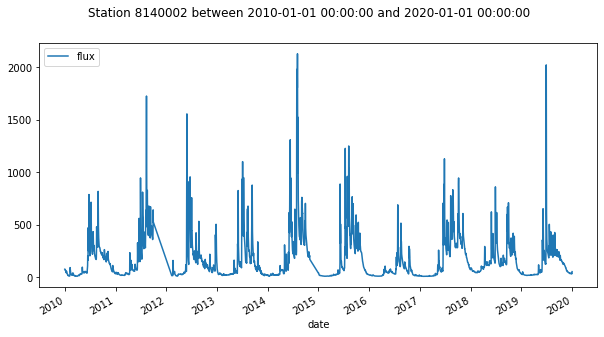

In [20]:
plot_one_timeseries(8140002, "flux", "2010-01-01", "2020-01-01")

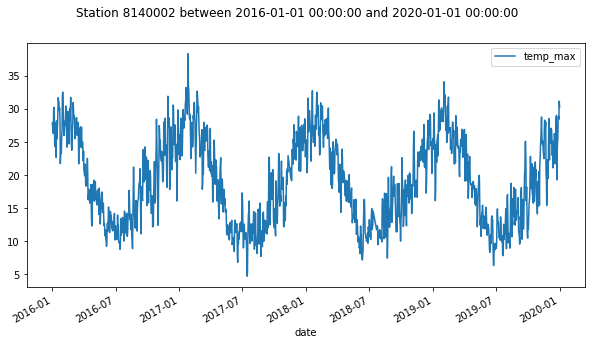

In [169]:
plot_one_timeseries(8140002, "temp_max", "2016", "2020")

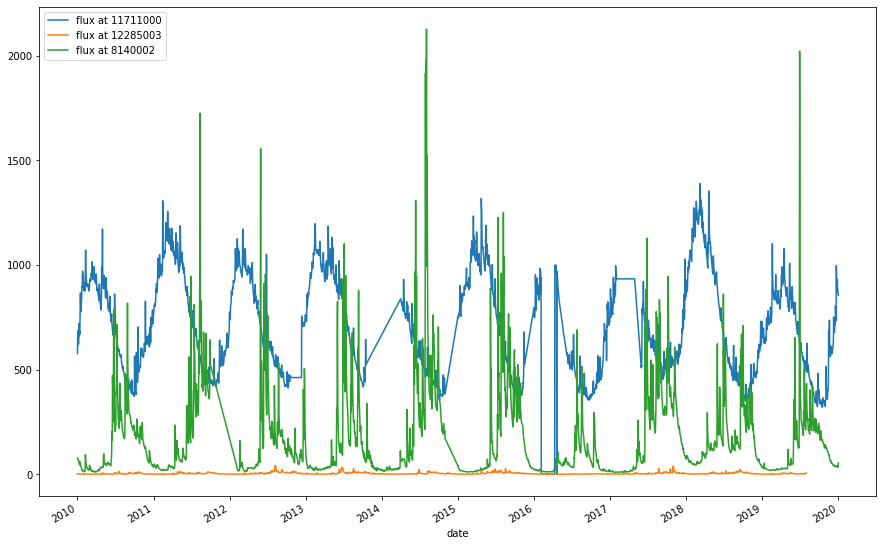

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))

plot_one_timeseries(11711000, "flux", "2010-01-01", "2020-01-01", ax=ax)
plot_one_timeseries(12285003, "flux", "2010-01-01", "2020-01-01", ax=ax)
plot_one_timeseries(8140002, "flux", "2010-01-01", "2020-01-01", ax=ax)

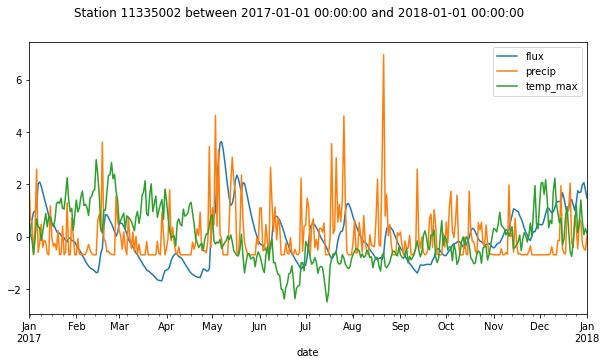

In [159]:
plot_three_timeseries(11335002, "2017-01-01", "2018-01-01")

### Creation of extreme variables

For the creation of the extreme variables we need to extract first the season from the date.
Then, we group by (`season`, `basin_id`) and for each variable we compute the 95th percentile considering all the samples from the dataset.
Also, it will be useful to extract the year from the date.

In [3]:
seasons = {
    "summer": [pd.to_datetime("2020-01-01"), pd.to_datetime("2020-03-20")],
    "autumn": [pd.to_datetime("2020-03-21"), pd.to_datetime("2020-06-20")],
    "winter": [pd.to_datetime("2020-06-21"), pd.to_datetime("2020-09-20")],
    "spring": [pd.to_datetime("2020-09-21"), pd.to_datetime("2020-12-20")],
}


def get_season(date: np.datetime64) -> str:
    """
    Obtains the season of a given date.

    Parameters
    ----------
    date : np.datetime64
        Date to check season.

    Returns
    -------
    str
        Season of the specified date.
    """
    date = date.replace(year=2020)

    if seasons["summer"][0] <= date <= seasons["summer"][1]:
        return "summer"
    if seasons["autumn"][0] <= date <= seasons["autumn"][1]:
        return "autumn"
    if seasons["winter"][0] <= date <= seasons["winter"][1]:
        return "winter"
    if seasons["spring"][0] <= date <= seasons["spring"][1]:
        return "spring"
    else:
        return "summer"


def create_extreme_variables(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create extreme variables by looking at the 95th percentile.

    Parameters
    ----------
    df : pd.DataFrame
        Needs season column.

    Returns
    -------
    pd.DataFrame
        DataFrame with the new columns.
    """
    quantiles = df.groupby(by=["season", "basin_id"])[
        ["flux", "precip", "temp_max"]
    ].quantile(0.95)
    df = df.join(quantiles, on=["season", "basin_id"], rsuffix="_q95")

    df["flux_extreme"] = (df["flux"] > df["flux_q95"]).astype(int)
    df["temp_extreme"] = (df["temp_max"] > df["temp_max_q95"]).astype(int)
    df["precip_extreme"] = (df["precip"] > df["precip_q95"]).astype(int)

    df = df.drop(columns=["flux_q95", "temp_max_q95", "precip_q95"])

    return df

In [4]:
df["year"] = df["date"].dt.year
df["season"] = df.apply(lambda x: get_season(x["date"]), axis=1)

df = create_extreme_variables(df)

In [13]:
df["flux_extreme"].value_counts()

0    3972735
1     207745
Name: flux_extreme, dtype: int64

In [14]:
df["flux_extreme"].value_counts(normalize=True) * 100

0    95.030595
1     4.969405
Name: flux_extreme, dtype: float64

We see that less than 5% of the samples are extreme flux events (ratio ~ 5:100). This means that we will be facing an unbalanced classification problem as the distribution of one class is highly skewed.

**Q: Do you consider this a good way of capturing extreme events? Or you would have used a different method? Which one?**

This method is standard to catalog extreme events.
Another option would be to select measurements that are at least some integer factor of the standard deviation away from the mean.
In the end, this corresponds to detecting outliers in a sample.

### Analysis of flux_extreme

**Q: Plot the variable flux_extreme. Are there any different behaviours among different watersheds?**

We can start by plotting 3 basins located in the same region (north). Specifically, in the same `region_cluster` (12 in this case).
Maybe, watersheds which are spatially close behave similarly.

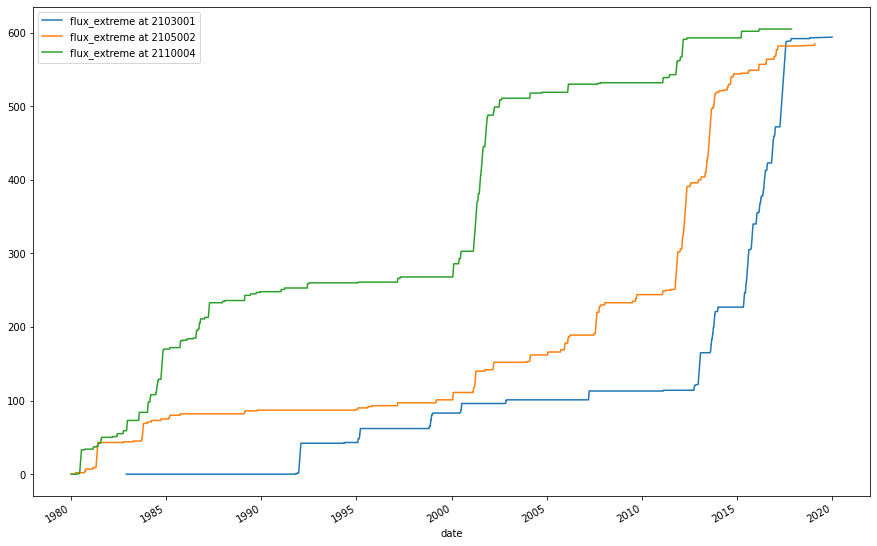

In [57]:
fig, ax = plt.subplots(figsize=(15, 10))

df.query("basin_id == 2103001").set_index(["date"])["flux_extreme"].cumsum().plot(
    ax=ax, label=f"flux_extreme at 2103001"
)
df.query("basin_id == 2105002").set_index(["date"])["flux_extreme"].cumsum().plot(
    ax=ax, label=f"flux_extreme at 2105002"
)
df.query("basin_id == 2110004").set_index(["date"])["flux_extreme"].cumsum().plot(
    ax=ax, label=f"flux_extreme at 2110004"
)
ax.legend().set_visible(True)

Now, we plot 3 basins, each one located in a different region: north, central, and south. Specifically, in `region_cluster` 12, 13, and 10 respectively.

In [ ]:
# df.drop_duplicates(['basin_id']).groupby(by=['region_cluster']).sample(3).query('region_cluster == 7')

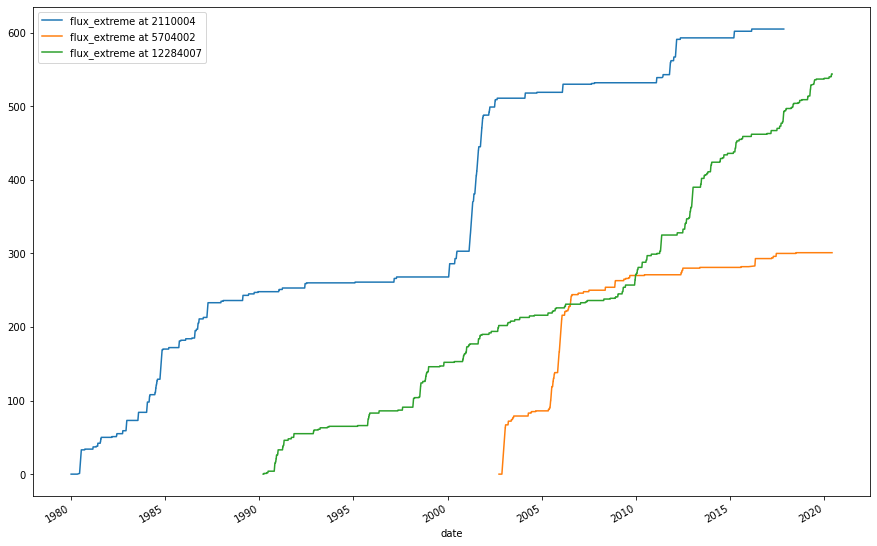

In [70]:
fig, ax = plt.subplots(figsize=(15, 10))

df.query("basin_id == 2110004").set_index(["date"])["flux_extreme"].cumsum().plot(
    ax=ax, label=f"flux_extreme at 2110004"
)
df.query("basin_id == 6008005").set_index(["date"])["flux_extreme"].cumsum().plot(
    ax=ax, label=f"flux_extreme at 5704002"
)
df.query("basin_id == 12284007").set_index(["date"])["flux_extreme"].cumsum().plot(
    ax=ax, label=f"flux_extreme at 12284007"
)
ax.legend().set_visible(True)

We can see that different basins behave differently, even if they are in the same region.
We could cluster the variables `mean_elev` and `area_km2` to check for similarities inside the classes.

One thing that it is worth mentioning is that the inspected basins undergo an explosion of extreme flux events at some point in time.

### Percentage of extreme events over time

We now plot the percentage of extreme events per year on the whole country for the three variables of interest.

<AxesSubplot:xlabel='year'>

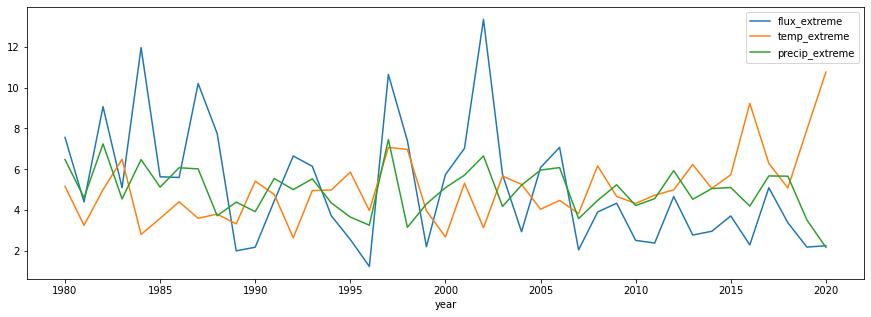

In [26]:
extreme_events_pct = (
    df.groupby(["year"])[["flux_extreme", "temp_extreme", "precip_extreme"]]
    .sum()
    .divide(
        df.groupby(["year"])[["flux_extreme", "temp_extreme", "precip_extreme"]].count()
    )
    * 100
)

fig, ax = plt.subplots(figsize=(15, 5))
extreme_events_pct.plot(ax=ax)

In order to see more clearly the tendency of each curve, we plot a linear regression.

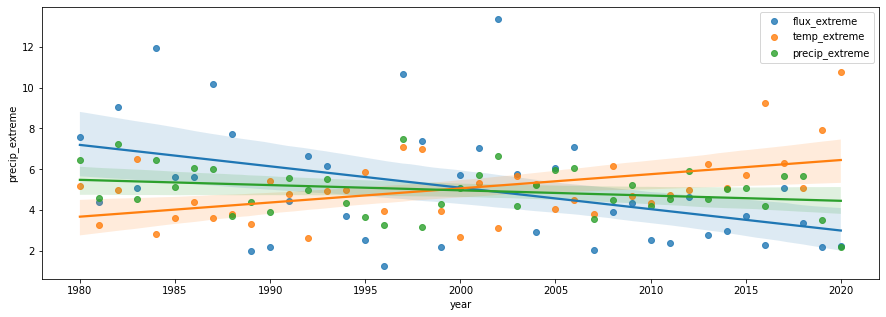

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.regplot(
    x=extreme_events_pct.index,
    y="flux_extreme",
    data=extreme_events_pct,
    fit_reg=True,
    ax=ax,
    label="flux_extreme",
)
sns.regplot(
    x=extreme_events_pct.index,
    y="temp_extreme",
    data=extreme_events_pct,
    fit_reg=True,
    ax=ax,
    label="temp_extreme",
)
sns.regplot(
    x=extreme_events_pct.index,
    y="precip_extreme",
    data=extreme_events_pct,
    fit_reg=True,
    ax=ax,
    label="precip_extreme",
)
ax.legend().set_visible(True)

From these plots we can see that the trend line of extreme flux events has negative slope, meaning that frequency of events is decreasing over time, and the same happens for extreme precipitation events. We also see that extreme temperature events are becoming more frequent.

These observations make sense as in the present we can observe the consecuences of global warming.

## Data preprocessing and feature engineering

We can recicle the functions that we defined earlier in order to create a new function that does all the loading and preprocessing of the data and returns data to feed the models.

In the process, we are going to add some new features:

- Clusterizarion of `mean_elev` and `area_km2`.
- Cumulative 95th quantile of each variable for each basin. We have to be careful of not considering the 95th quantile of all the samples, because we used those quantities to create the variable to predict.
- Some moving averages.
- Encoding of categorical variables.

Also, as we are dealing with time series and we want to make a prediction for a `forecast_horizon`, we will shift the data in order to predict the future.

In [56]:
required = [
    "date",
    "basin_id",
    "flux",
    "precip",
    "temp_max",
    "lat",
    "lon",
    "mean_elev",
    "area_km2",
]

to_drop = [
    "date",
    "gauge_name",
    "lat",
    "lon",
    "mean_elev",
    "area_km2",
]

categorical_features = [
    'basin_id',
    f'region_cluster_t-{forecast_horizon}',
    f'mean_elev_cluster_t-{forecast_horizon}',
    f'area_cluster_t-{forecast_horizon}',
]

In [69]:
def get_features(forecast_horizon : int = 1) -> tuple[pd.DataFrame, pd.Series]:
    """
    Load and preprocess the dataset.

    Parameters
    ----------

    Returns
    -------
    pd.DataFrame, pd.Series
        X, y.
    """
    df = load_data()

    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["season"] = df.apply(lambda x: get_season(x["date"]), axis=1)

    from sklearn.cluster import MiniBatchKMeans

    kmeans = MiniBatchKMeans(n_clusters=15, batch_size=1000)
    kmeans.fit(df[["lat", "lon"]])
    df["region_cluster"] = kmeans.labels_

    kmeans_elev = MiniBatchKMeans(n_clusters=10, batch_size=1000)
    kmeans_elev.fit(df[["mean_elev"]])
    df["mean_elev_cluster"] = kmeans_elev.labels_

    kmeans_area = MiniBatchKMeans(n_clusters=10, batch_size=1000)
    kmeans_area.fit(df[["area_km2"]])
    df["area_cluster"] = kmeans_area.labels_

    df = create_extreme_variables(df)

    cumulative_quantiles = (
        df.groupby(by=["season", "basin_id"])[["flux", "precip", "temp_max"]]
        .expanding(1)
        .quantile(0.95)
    )
    df = df.join(
        cumulative_quantiles, on=["season", "basin_id", df.index], rsuffix="_cum_q95"
    )

    df["flux_normalized"] = df["flux"].div(df["flux_cum_q95"]).replace(np.inf, 0)
    df["precip_normalized"] = df["precip"].div(df["precip_cum_q95"]).replace(np.inf, 0)
    df["temp_normalized"] = (
        df["temp_max"].div(df["temp_max_cum_q95"]).replace(np.inf, 0)
    )

    # añadir std()
    df_3d = (
        df.groupby(by=["basin_id"])[["flux", "precip", "temp_max", "date"]]
        .rolling("3d", on="date")
        .mean()
    )
    df_7d = (
        df.groupby(by=["basin_id"])[["flux", "precip", "temp_max", "date"]]
        .rolling("7d", on="date")
        .mean()
    )
    df_15d = (
        df.groupby(by=["basin_id"])[["flux", "precip", "temp_max", "date"]]
        .rolling("15d", on="date")
        .mean()
    )
    df_30d = (
        df.groupby(by=["basin_id"])[["flux", "precip", "temp_max", "date"]]
        .rolling("30d", on="date")
        .mean()
    )

    df = pd.merge(
        df, df_3d, how="left", on=["basin_id", "date"], suffixes=("", "_3d_mean")
    )
    df = pd.merge(
        df, df_7d, how="left", on=["basin_id", "date"], suffixes=("", "_7d_mean")
    )
    df = pd.merge(
        df, df_15d, how="left", on=["basin_id", "date"], suffixes=("", "_15d_mean")
    )
    df = pd.merge(
        df, df_30d, how="left", on=["basin_id", "date"], suffixes=("", "_30d_mean")
    )

    from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

    le_id = LabelEncoder()
    df["basin_id"] = le_id.fit_transform(df["basin_id"])

    le_season = OrdinalEncoder(categories=[['summer', 'autumn', 'winter', 'spring']])
    df["season"] = le_season.fit_transform(df.loc[:,['season']])[:,0]

    df = df.drop(to_drop, axis=1)

    shifted_df = df.groupby(by=["basin_id"]).shift(forecast_horizon)
    shifted_df.columns = [f"{x}_t-{forecast_horizon}" for x in shifted_df.columns]
    df = pd.concat([df["flux_extreme"], df["basin_id"], shifted_df], axis=1)
    df = df.dropna(axis=0)
    X = df.drop(columns=["flux_extreme"])
    y = df["flux_extreme"]

    return X, y

In [ ]:
X, y = get_features(forecast_horizon=3)

Lets take a look at the correlation matrix

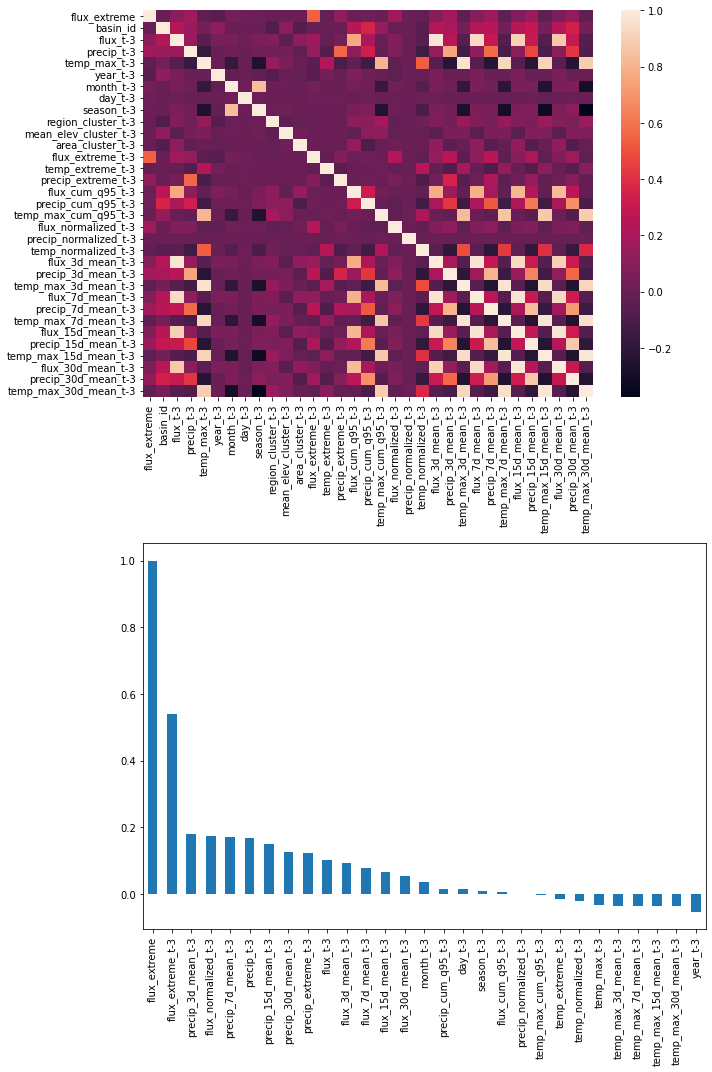

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))

sns.heatmap(pd.concat([y, X], axis=1).corr(), ax=ax[0])
pd.concat([X.drop(columns=categorical_features), y], axis=1).corr()["flux_extreme"].sort_values(ascending=False).plot.bar(
    ax=ax[1]
)
fig.tight_layout()

We can see that the features with the highest correlation with `flux_extreme`are the past values `flux_extreme` and `precip`.
On the other hand, we could drop some features that have small correlation with `flux_extreme`, but for the moment we will let the models to decide their importance.

## Modeling

The first question is which will be the use case of the model.
We propose the following:

- Each basin will input their measurements everyday.
- This new input will produce a prediction of the occurence of an extreme event in that particular basin/area in a given number of days.
- How many days? It is a tricky question. Maybe it is impossible to ask for predictions for the next day since the measurements could be taken in the evenings or some other kind of limitations in this regard.
Also, this will depend on how we want to act facing extreme events. If, for example, we need time to prepare for those events, a larger window of days is needed. For this challenge I propose to use 2-3 days as time window, but in a real scenario I would leave that decision to the experts.

**Q: Which data can be used and which cannot? Of course, we cannot use future data, but what about data from the same day? Or from the previous day?**

In short, given the proposed use case of the model, we will use all past data.
We will be using all measurements of the day `t - forecast_horizon`. Also, since we are dealing with time series, aggregated quantities from different time windows sizes will also be tracked (moving averages).
Moreover, we will also use the cumulated 95th percentile for each variable, that means, the 95th percentile of the samples up to the day we are looking at (this accounts for all past data).

We start by implementing a pair of functions that will help us to evaluate models.

In [ ]:
def evaluate_model(model, X: pd.DataFrame, Y: pd.Series, cv: TimeSeriesSplit) -> None:

    accuracy = np.empty(cv.get_n_splits())
    precision = np.empty(cv.get_n_splits())
    recall = np.empty(cv.get_n_splits())
    roc_auc = np.empty(cv.get_n_splits())
    f1 = np.empty(cv.get_n_splits())

    for id_fold, (train_index, test_index) in enumerate(cv.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # print('pred: ' + str(y_pred.sum()) + 'test: ' + str(y_test.sum()))

        accuracy[id_fold] = balanced_accuracy_score(y_test, y_pred)
        precision[id_fold] = precision_score(y_test, y_pred, zero_division=0)
        recall[id_fold] = recall_score(y_test, y_pred, zero_division=0)
        f1[id_fold] = f1_score(y_test, y_pred, zero_division=0)
        roc_auc[id_fold] = roc_auc_score(y_test, y_pred)

    print("Accuracy: " + str(accuracy.mean()))
    print("Precision: " + str(precision.mean()))
    print("Recall: " + str(recall.mean()))
    print("F1: " + str(f1.mean()))
    print("AUC: " + str(roc_auc.mean()))

In [48]:
from sklearn.metrics import (
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    auc,
    roc_curve,
    RocCurveDisplay,
)
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import matplotlib

def evaluate_model(model, X: pd.DataFrame, Y: pd.Series, cv: TimeSeriesSplit) -> dict:
    """
    Version of cross_validate that allows to pass zero_division parameter to scores
    """

    accuracy = np.empty(cv.get_n_splits())
    precision = np.empty(cv.get_n_splits())
    recall = np.empty(cv.get_n_splits())
    f1 = np.empty(cv.get_n_splits())
    roc_auc = np.empty(cv.get_n_splits())
    
    for id_fold, (train_index, test_index) in enumerate(cv.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy[id_fold] = balanced_accuracy_score(y_test, y_pred)
        precision[id_fold] = precision_score(y_test, y_pred, zero_division=0)
        recall[id_fold] = recall_score(y_test, y_pred, zero_division=0)
        f1[id_fold] = f1_score(y_test, y_pred, zero_division=0)
        roc_auc[id_fold] = roc_auc_score(y_test, y_pred)
        
    scores = {
        'balanced_accuracy': accuracy.mean(),
        'precision': precision.mean(),
        'recall': recall.mean(),
        'f1': f1.mean(),
        'roc_auc': roc_auc.mean(),
    }
    
    return scores

def plot_roc_curve(
    y_test: pd.Series,
    y_pred: pd.Series,
    estimator_name: str = None,
    ax: matplotlib.axes.Axes = None,
) -> None:
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(
        fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=estimator_name
    )
    display.plot(ax=ax)

    ax.plot([0, 1], [0, 1], "k--")  # Dashed diagonal
    ax.legend().set_visible(True)
    ax.set_title("ROC curve")

In [43]:
scores = [
    'balanced_accuracy',
    'precision',
    'recall',
    'f1',
    'roc_auc',
]

In [38]:
ts_cv = TimeSeriesSplit(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

logreg = LogisticRegression()
logreg_scores = evaluate_model(logreg, X_train.drop(columns=categorical_features), y_train, ts_cv)

gnb = GaussianNB()
gnb_scores = evaluate_model(gnb, X_train.drop(columns=categorical_features), y_train, ts_cv)

sgdc = SGDClassifier()
sgdc_scores = evaluate_model(sgdc, X_train.drop(columns=categorical_features), y_train, ts_cv)

mlpc = MLPClassifier()
mlpc_scores = evaluate_model(mlpc, X_train.drop(columns=categorical_features), y_train, ts_cv)

xgbc = XGBClassifier()
xgbc_scores = evaluate_model(xgbc, X_train.drop(columns=categorical_features).to_numpy(), y_train.to_numpy(), ts_cv)

lgbc = LGBMClassifier()
lgbc_scores = evaluate_model(lgbc, X_train.drop(columns=categorical_features), y_train, ts_cv)

In [ ]:
#plot multiples dictionaries

With this model we do not obtain positive predictions. This corresponds to a completely random classifier.

This model is also randomly guessing the outputs.

Things start to get a little bit better.

A lot better.

Now lets compare out of sample ROC curves.

In [ ]:
gnb.fit(X_train, y_train)
sgdc.fit(X_train, y_train)
mlpc.fit(X_train, y_train)
xgbc.fit(X_train, y_train)
lgbc.fit(X_train, y_train)

y_pred_gnb = gnb.predict_proba(X_test)
y_pred_sgdc = sgdc.predict_proba(X_test)
y_pred_mlpc = mlpc.predict_proba(X_test)
y_pred_xgbc = xgbc.predict_proba(X_test)
y_pred_lgbc = lgbc.predict_proba(X_test)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_roc_curve(y_test, y_pred_gnb[:, [1]], estimator_name="GaussianNB", ax=ax)
plot_roc_curve(y_test, y_pred_sgdc[:, [1]], estimator_name="SGDClassifier", ax=ax)
plot_roc_curve(y_test, y_pred_mlpc[:, [1]], estimator_name="MLPClassifier", ax=ax)
plot_roc_curve(y_test, y_pred_xgbc[:, [1]], estimator_name="XGBClassifier", ax=ax)
plot_roc_curve(y_test, y_pred_lgbc[:, [1]], estimator_name="LGBMClassifier", ax=ax)

Following this analysis, we chose LightGBM as the final model to train since it is the one with best ROC curve, higher AUC, and F1 scores.

For model selection we could have used nested cross-validation to compare models with tunned hyperparameters and other techniques for more finer selection of model such as information criteria, etc., but we prefer to not go that deep since time is short.

## Hyperparameter tunning

Since we are in an unbalance classification situation, we will be optimizing the AUC score of the model as we will fine-tune the threshold probability later according to our interests.

### Optuna and lightgbm scikit-learn API

In [71]:
import joblib
import lightgbm as lgb
import optuna
from lightgbm import early_stopping
from lightgbm import log_evaluation
from sklearn.model_selection import train_test_split


def train_model(forecast_horizon : int = 1) -> bool:

    X, y = get_features(forecast_horizon)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )
    
    ts_cv = TimeSeriesSplit(n_splits=4)

    def objective(trial, X, y, cv):
        params = {
            "objective": "binary",
            "metric": "auc",
            "is_unbalance": True,
            "verbosity": -1,
            "boosting_type": "gbdt",
            "seed": 1337,
            "nrounds": trial.suggest_int("n_estimators", 20, 100),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "max_depth": trial.suggest_int("max_depth", 3, 12),
            "max_bin": trial.suggest_int("max_bin", 200, 300),
            "reg_alpha": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
            "reg_lambda": trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
            "num_leaves": trial.suggest_int("num_leaves", 2, 512),
            "colsample_bytree": trial.suggest_uniform("feature_fraction", 0.1, 1.0),
            "subsample": trial.suggest_uniform("bagging_fraction", 0.1, 1.0),
            "subsample_freq": trial.suggest_int("bagging_freq", 0, 15),
            "min_child_samples": trial.suggest_int("min_child_samples", 1, 100),
        }
        
        dtrain = lgb.Dataset(X, label=y, categorical_feature=categorical_features)
        
        score = lgb.cv(
            params,
            dtrain,
            folds=cv,
            shuffle=False,
            callbacks=[early_stopping(100, verbose=False)],
        )
                
        return score['auc-mean'][-1]

    study = optuna.create_study(direction="maximize")
    func = lambda trial: objective(trial, X_train, y_train, ts_cv)
    study.optimize(func, n_trials=20)

    params = study.best_params
    
    dtrain = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
    dvalid = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features)
    
    lgbc = lgb.train(
        params,
        dtrain,
        valid_sets=dvalid,
        categorical_feature=categorical_features,
        callbacks=[early_stopping(100, verbose=False)],
    )

    y_pred = lgbc.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f'AUC: {roc_auc.mean()}')

    pickled_model = os.path.join("..", "models", f'model_{forecast_horizon}d.pkl')
    best_estimator = lgbc
    best_estimator.feature_importances_ = lgbc.feature_importance
    best_estimator.feature_name_ = lgbc.feature_name
    joblib.dump(best_estimator, pickled_model)

    return True

In [65]:
train_model(forecast_horizon=3)

[I 2022-06-09 22:31:53,774] A new study created in memory with name: no-name-adf812b3-7a79-40c3-acef-cb9648889873
/home/fmunozh/projects/spike-challenge/watershed-challenge/venv/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: nrounds


[I 2022-06-09 22:32:35,180] Trial 0 finished with value: 0.9133104475933471 and parameters: {'n_estimators': 70, 'learning_rate': 0.13893718327694116, 'max_depth': 3, 'max_bin': 233, 'lambda_l1': 5.926234360726752e-07, 'lambda_l2': 1.585759130310446e-06, 'num_leaves': 470, 'feature_fraction': 0.44255994746326865, 'bagging_fraction': 0.2916121364542485, 'bagging_freq': 14, 'min_child_samples': 37}. Best is trial 0 with value: 0.9133104475933471.
/home/fmunozh/projects/spike-challenge/watershed-challenge/venv/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
[I 2022-06-09 22:33:59,954] Trial 1 finished with value: 0.9077454559159811 and parameters: {'n_estimators': 40, 'learning_rate': 0.2281114083052541, 'max_depth': 10, 'max_bin': 288, 'lambda_l1': 7.906815291314538e-05, 'lambda_l2': 0.00026909067182730623, 'num_leaves': 451, 'feature_fraction': 0.6814918211804265, 'bagging_fra

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 3274011, number of used features: 32


/home/fmunozh/projects/spike-challenge/watershed-challenge/venv/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/home/fmunozh/projects/spike-challenge/watershed-challenge/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Start training from score 0.054297
AUC: 0.9099077945011498


True

## Model results analysis

As before, lets start by implementing a pair of functions to summarize the results of the model.

In [72]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    precision_recall_curve,
)

MODEL_PATH = os.path.join("..", "models", "model_3d.pkl")

def plot_precision_recall_curve(
    pre: np.ndarray, rec: np.ndarray, ax: matplotlib.axes.Axes = None, index: int = None
) -> None:
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))

    ax.plot(rec, pre, linewidth=2)

    if index is not None:
        ax.scatter(rec[index], pre[index], marker="o", color="green", label="Best")
        ax.vlines(rec[index], 0, pre[index], linestyle="dashed", color="red")
        ax.hlines(pre[index], 0, rec[index], linestyle="dashed", color="red")

    ax.set_ylabel("Precision")
    ax.set_xlabel("Recall")
    ax.legend().set_visible(True)
    ax.set_title("Precision-Recall curve")


def model_results(X: pd.DataFrame, y: pd.Series, model_path: str = MODEL_PATH) -> None:
    model = joblib.load(model_path)

    y_pred = model.predict(X)

    pre, rec, thresholds = precision_recall_curve(y, y_pred)
    index = np.argmax(rec <= 0.7)
    threshold = thresholds[index]

    fig, axs = plt.subplots(3, 1, figsize=(10, 24))
    
    cm = confusion_matrix(y_test, (y_pred > threshold).astype(int))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axs[0], cmap="Blues")
    axs[0].set_title("Confusion matrix")
    
    plot_precision_recall_curve(pre, rec, index=index, ax=axs[1])
    
    lgb.plot_importance(model, ax=axs[2])
 
    print(classification_report(y_test, (y_pred > threshold).astype(int)))
    

In [67]:
X, y = get_features()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    792791
           1       0.21      0.70      0.32     25712

    accuracy                           0.91    818503
   macro avg       0.60      0.81      0.63    818503
weighted avg       0.96      0.91      0.93    818503



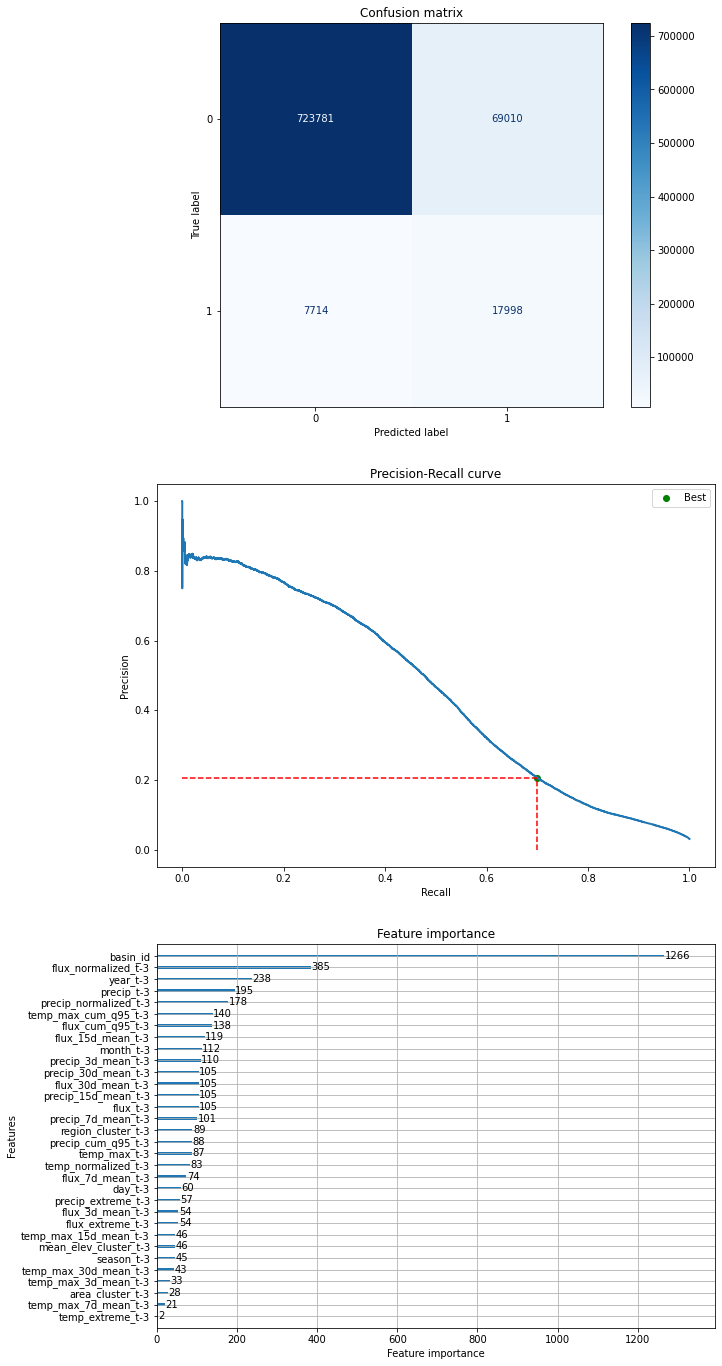

In [68]:
model_results(X_test, y_test)

We see in the confusion matrix that the most accurate predictions are for the 0 class. This is natural since the dataset is highly unbalanced.

**a) What is the performance of the model? Which metrics you consider are the best suited for this problem? What are the most important variables? What do you think about the results?**

- One of the most important metric is the Precision-Recall curve since we are dealing with an imbalanced classification problem. We need to tweak the threshold given our specific interests.
- The five most important variables for the model are `basin_id`, `flux_15d_mean`, `flux_cum_q95`, `precip_normalized`, and `temp_max_cum_q95`. It is interesting to see`basin_id `, as the model is constructed from an ensemble of trees we can imagine that there is a tree for each basin, like a model for each one.
- All in all we can say that the model gives good results, at least in this particular dataset.

**b) If we wanted to identify at least 70% of the extreme flux events, which are the metrics of your model for that threshold? It is a useful model?**

- If we want to identify ar least 70% of events we need to look at the recall score of the model, the ratio of correctly identified events with respect to all the events cataloged as extreme.
- Given the recall/precision trade-off, we can look at the Precision-Recall curve and fine tune the threshold in order to obtain a recall of 0.7.

In [ ]:
def predict(X, threshold):
    pass